In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.utils import to_categorical

Using TensorFlow backend.


### Load training data

Load `train.csv` from Kaggle into a pandas DataFrame.

In [2]:
data = pd.read_csv('./train.csv')
data.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data = data.as_matrix()
data

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]])

### Set up X and y

NOTE: Keras requires a `numpy` matrix, it doesn't work with `pandas`.

In [4]:
y = data[:,0]
X = data[:,1:]


X.shape 

(42000, 784)

There are 42,000 images in the data set, each being 784 pixels.


In [5]:
X = X / 255.0

This normalizes the data so it can be read as greyscale.


In [6]:
X = X.reshape(X.shape[0], 28,28,1)

Gets the data into a readable format.

In [7]:
y = to_categorical(y)

In [8]:
y.shape

(42000, 10)

### Preprocessing

1. When dealing with image data, you need to normalize your `X` by dividing each value by the max number of pixels (255).
2. Your `X` is currently a 42,000 x 784 matrix. For a CNN model, this needs to be reshaped into a **42,000 x 28 x 28 x 1** matrix
3. Since this is a multiclass classification problem, keras needs `y` to be a one-hot encoded matrix

For all preprocessing, see above.

### Train/Test Split

We want to create a validation set that the model will never see to approximate how it's going to do with Kaggle's `test.csv`. Use `sklearn`'s `train_test_split` to do this.

In [9]:
#Train, test split

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, random_state=42, stratify=y)

### Create your convolutional neural network

Create a convolutional neural network using the `Dense`, `Dropout`, `Conv2D`, `MaxPool2D` and `Flatten` layers from `keras`. Your activation function for the final output layer needs to be `softmax` to account for there being ten different classes.

In [10]:
model = Sequential()
model.add(Conv2D(15, (5,5), input_shape=(28,28, 1), activation='relu')) #tuple is the size of the magnifying glass
model.add(MaxPool2D((2, 2))) #search params
model.add(Conv2D(30, (4,4), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

### Compile your model

Since this is a multiclass classification problem, your loss function is `categorical_crossentropy`.

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Fit the model

Use your X_test, y_test from the `train_test_split` step for the `validation_data` parameter.

In [41]:
hist = model.fit(X_train, y_train, validation_data=(X_holdout, y_holdout), epochs=10)

Train on 31500 samples, validate on 10500 samples
Epoch 1/10
31500/31500 [==============================] - 24s 767us/step - loss: 0.0091 - acc: 0.9970 - val_loss: 0.0531 - val_acc: 0.9889
Epoch 2/10
31500/31500 [==============================] - 24s 748us/step - loss: 0.0066 - acc: 0.9978 - val_loss: 0.0395 - val_acc: 0.9916
Epoch 3/10
31500/31500 [==============================] - 24s 755us/step - loss: 0.0064 - acc: 0.9977 - val_loss: 0.0453 - val_acc: 0.9924
Epoch 4/10
31500/31500 [==============================] - 24s 771us/step - loss: 0.0080 - acc: 0.9973 - val_loss: 0.0541 - val_acc: 0.9884
Epoch 5/10
31500/31500 [==============================] - 25s 795us/step - loss: 0.0064 - acc: 0.9975 - val_loss: 0.0446 - val_acc: 0.9923
Epoch 6/10
31500/31500 [==============================] - 28s 892us/step - loss: 0.0029 - acc: 0.9990 - val_loss: 0.0505 - val_acc: 0.9918
Epoch 7/10
31500/31500 [==============================] - 27s 863us/step - loss: 0.0060 - acc: 0.9979 - val_loss: 0.

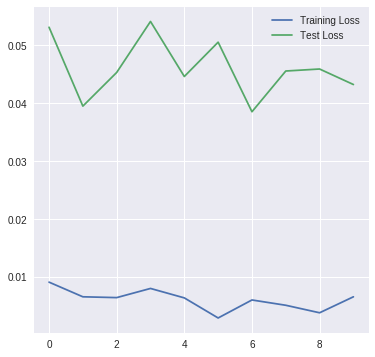

In [43]:
import seaborn as sns

sns.mpl.pyplot.figure(figsize=(6,6))
sns.mpl.pyplot.plot(hist.history['loss'], label='Training Loss')
sns.mpl.pyplot.plot(hist.history['val_loss'], label='Test Loss')
sns.mpl.pyplot.legend();

# Another one - with Dropout


In [46]:
model = Sequential()
model.add(Conv2D(20, (5,5), input_shape=(28,28, 1), activation='relu')) #tuple is the size of the magnifying glass
model.add(MaxPool2D((2, 2))) #search params
model.add(Dropout(.25))
model.add(Conv2D(30, (4,4), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [47]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
hist = model.fit(X_train, y_train, validation_data=(X_holdout, y_holdout), epochs=25)

Train on 31500 samples, validate on 10500 samples
Epoch 1/10
31500/31500 [==============================] - 28s 899us/step - loss: 0.3351 - acc: 0.8927 - val_loss: 0.1264 - val_acc: 0.9608
Epoch 2/10
31500/31500 [==============================] - 29s 921us/step - loss: 0.0926 - acc: 0.9710 - val_loss: 0.0847 - val_acc: 0.9746
Epoch 3/10
31500/31500 [==============================] - 29s 926us/step - loss: 0.0623 - acc: 0.9797 - val_loss: 0.0537 - val_acc: 0.9831
Epoch 4/10
31500/31500 [==============================] - 30s 942us/step - loss: 0.0484 - acc: 0.9843 - val_loss: 0.0515 - val_acc: 0.9830
Epoch 5/10
31500/31500 [==============================] - 33s 1ms/step - loss: 0.0377 - acc: 0.9882 - val_loss: 0.0534 - val_acc: 0.9854
Epoch 6/10
31500/31500 [==============================] - 29s 936us/step - loss: 0.0310 - acc: 0.9896 - val_loss: 0.0469 - val_acc: 0.9850
Epoch 7/10
31500/31500 [==============================] - 28s 893us/step - loss: 0.0269 - acc: 0.9911 - val_loss: 0.03

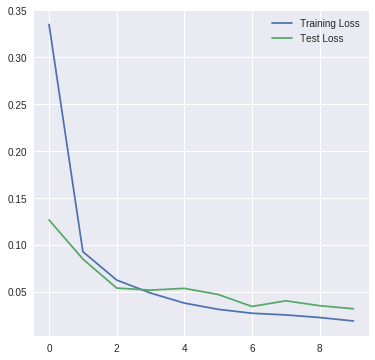

In [49]:
sns.mpl.pyplot.figure(figsize=(6,6))
sns.mpl.pyplot.plot(hist.history['loss'], label='Training Loss')
sns.mpl.pyplot.plot(hist.history['val_loss'], label='Test Loss')
sns.mpl.pyplot.legend();

# Another 

In [60]:
model = Sequential()
model.add(Conv2D(20, (5,5), input_shape=(28,28, 1), activation='relu')) #tuple is the size of the magnifying glass
model.add(MaxPool2D((2,2))) #search params
model.add(Dropout(.25))
model.add(Conv2D(30, (4,4), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(X_train, y_train, validation_data=(X_holdout, y_holdout), epochs=25)

sns.mpl.pyplot.figure(figsize=(6,6))
sns.mpl.pyplot.plot(hist.history['loss'], label='Training Loss')
sns.mpl.pyplot.plot(hist.history['val_loss'], label='Test Loss')
sns.mpl.pyplot.legend();

# Another

Train on 31500 samples, validate on 10500 samples
Epoch 1/30
31500/31500 [==============================] - 16s 515us/step - loss: 0.5411 - acc: 0.8260 - val_loss: 0.1991 - val_acc: 0.9432
Epoch 2/30
31500/31500 [==============================] - 17s 526us/step - loss: 0.1521 - acc: 0.9545 - val_loss: 0.1186 - val_acc: 0.9635
Epoch 3/30
31500/31500 [==============================] - 16s 516us/step - loss: 0.0988 - acc: 0.9695 - val_loss: 0.1080 - val_acc: 0.9679
Epoch 4/30
31500/31500 [==============================] - 16s 519us/step - loss: 0.0735 - acc: 0.9770 - val_loss: 0.0722 - val_acc: 0.9790
Epoch 5/30
31500/31500 [==============================] - 17s 524us/step - loss: 0.0589 - acc: 0.9825 - val_loss: 0.0650 - val_acc: 0.9822
Epoch 6/30
31500/31500 [==============================] - 17s 525us/step - loss: 0.0500 - acc: 0.9851 - val_loss: 0.0663 - val_acc: 0.9815
Epoch 7/30
31500/31500 [==============================] - 17s 538us/step - loss: 0.0416 - acc: 0.9874 - val_loss: 0.

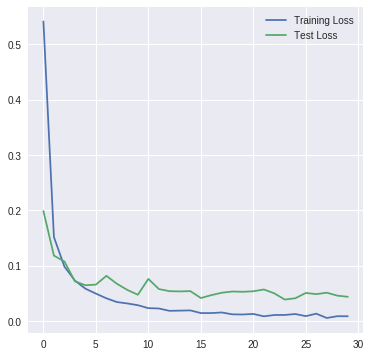

In [82]:
model = Sequential()
model.add(Conv2D(20, (5,5), input_shape=(28,28, 1), activation='relu')) #tuple is the size of the magnifying glass
model.add(MaxPool2D((4,4))) #search params

model.add(Conv2D(20, (5,5), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(X_train, y_train, validation_data=(X_holdout, y_holdout), epochs=30)

sns.mpl.pyplot.figure(figsize=(6,6))
sns.mpl.pyplot.plot(hist.history['loss'], label='Training Loss')
sns.mpl.pyplot.plot(hist.history['val_loss'], label='Test Loss')
sns.mpl.pyplot.legend();

### Load in Kaggle's `test.csv`

Be sure to do the **same** preprocessing you did for your training `X`.

In [83]:
test = pd.read_csv('./test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
test = test.as_matrix() #turns it into a np.array

In [85]:
test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [86]:
X_test = test

In [87]:
X_test = X_test/255.0

In [88]:
X_test = X_test.reshape(X_test.shape[0], 28,28,1) #same as above

### Create your predictions

Use `predict_classes` to get the actual numerical values (0-9).

In [89]:
preds = model.predict_classes(X_test)
preds

array([2, 0, 9, ..., 3, 9, 2])

### Prepare your submission

Create a submission DataFrame with the following:

1. Add your predictions to a column called `Label`
2. You'll need to manually create the `ImageId` column, which is just a list of 1..[NUMBER OF TEST SAMPLES]

In [90]:
X_test.shape
preds.shape

(28000,)

In [91]:
submission = pd.DataFrame()
submission['Label'] = preds
submission['ImageID'] = list(range(1, X_test.shape[0]+1))
submission.head()

,Label,ImageID
0,2,1
1,0,2
2,9,3
3,0,4
4,3,5


### Create your submission csv

Remember to set `index=False`!

In [92]:
submission[['Label', 'ImageID']].to_csv('submission_4.csv', index = False)